In [ ]:
Get the numerical variables from our dataset.
Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
import math
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [4]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.shape

(9134, 24)

In [5]:
data2 = data.copy()
data2.columns = [c.lower().replace(' ', '_') for c in data.columns]
data2 = data2.drop_duplicates()
data2.shape

(9134, 24)

In [6]:
data2.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [10]:
nums = data2.select_dtypes(np.number).replace(np.nan, 0).fillna(0) #continues

In [15]:
def numerical_hist(nums):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(nums):
        plt.figure(i)
        sns.distplot(nums[col])
        plt.show()

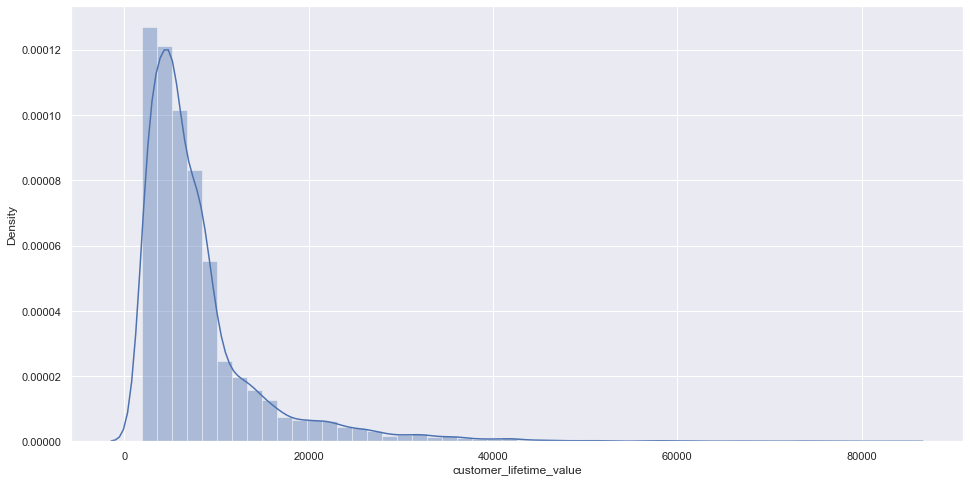

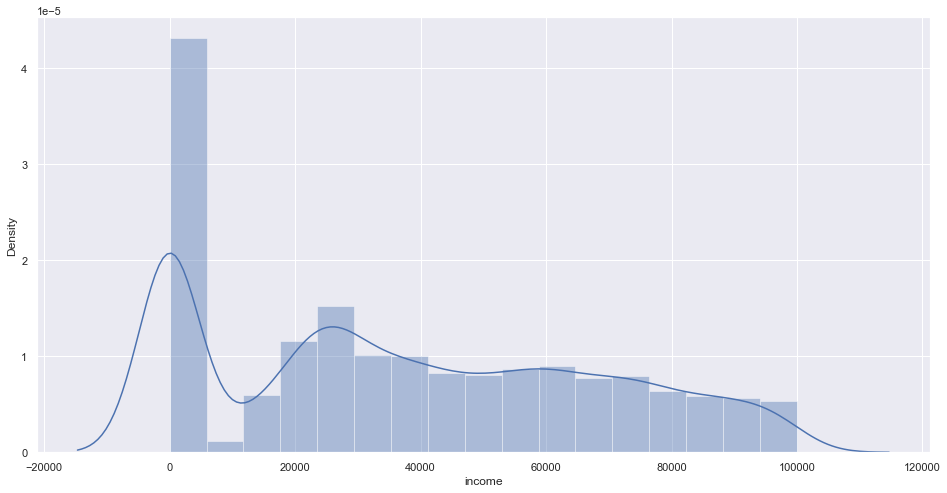

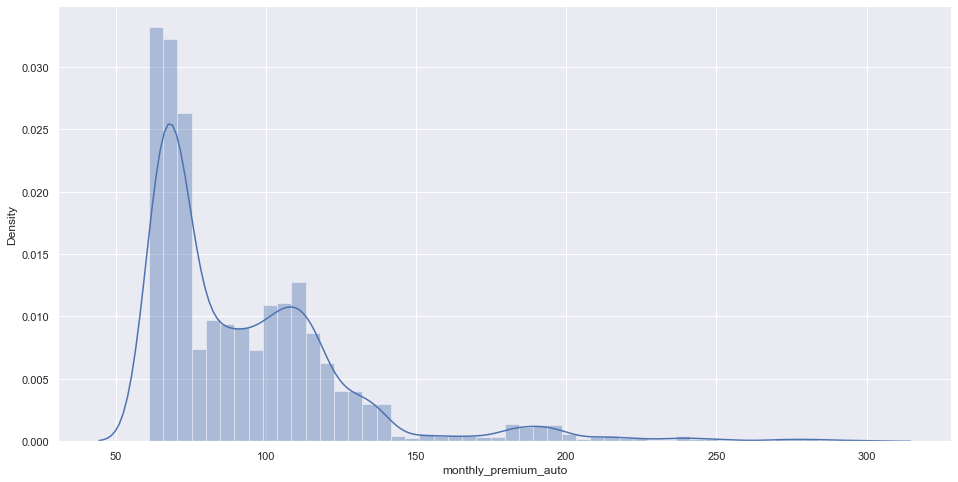

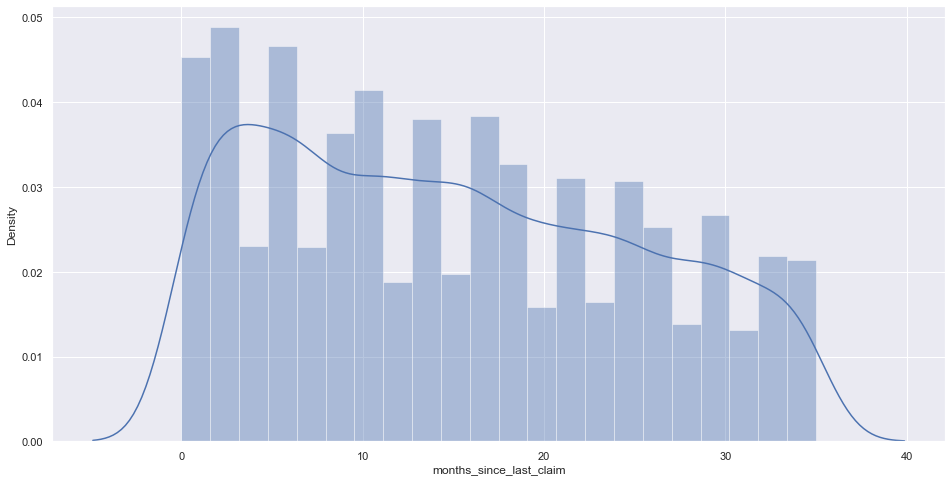

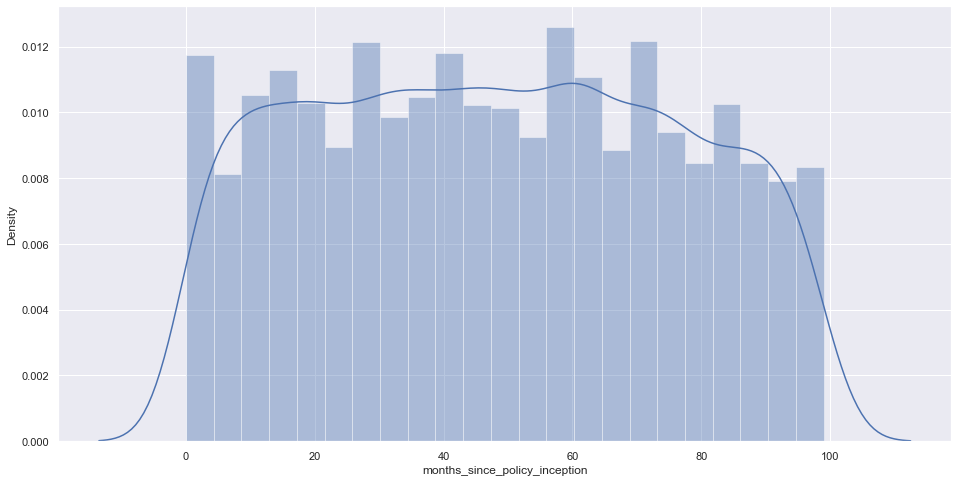

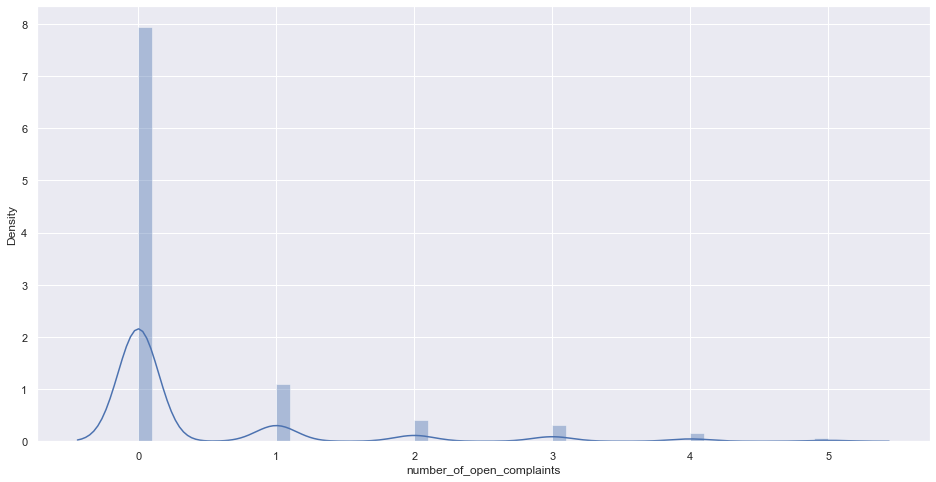

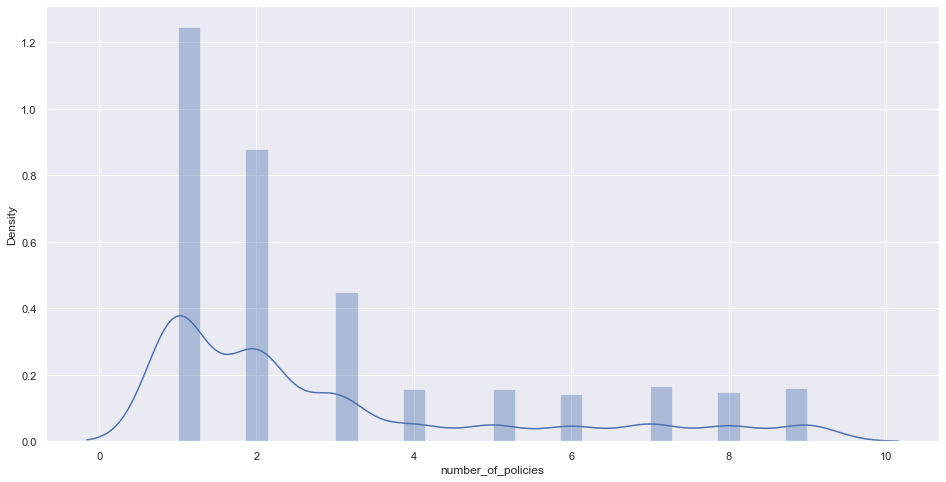

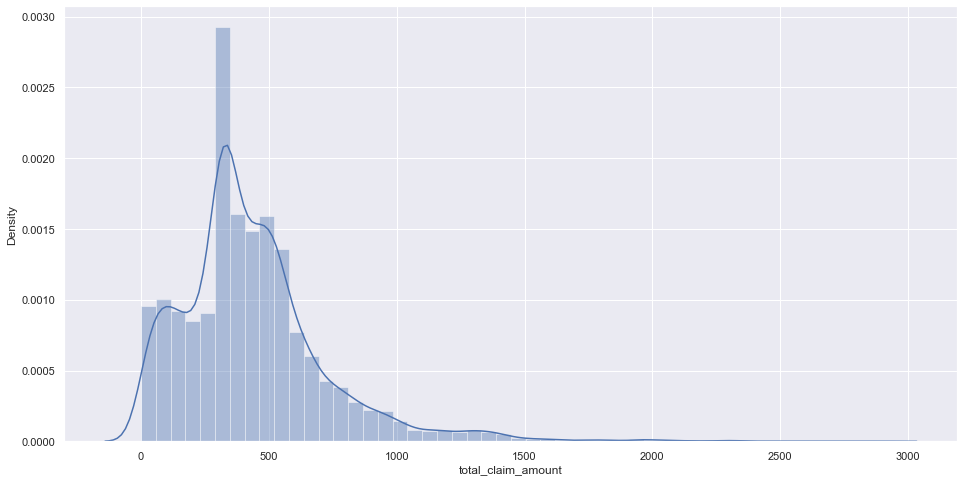

In [16]:
numerical_hist(nums) #never scale your target variable

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_log,customer_lifetime_value_boxcox
0,2763.519279,56274,69,32,5,0,1,384.811147,7.924260,2.703839
1,6979.535903,0,94,13,42,0,8,1131.464935,8.850738,2.754926
2,12887.431650,48767,108,18,38,0,2,566.472247,9.464008,2.780772
3,7645.861827,0,106,18,65,0,7,529.881344,8.941920,2.759125
4,2813.692575,43836,73,12,44,0,1,138.130879,7.942253,2.704995
...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,10.060747,2.801170
9130,3096.511217,21604,79,14,28,0,1,379.200000,8.038031,2.711030
9131,8163.890428,0,85,9,37,3,2,790.784983,9.007476,2.762062
9132,7524.442436,21941,96,34,3,0,3,691.200000,8.925912,2.758397


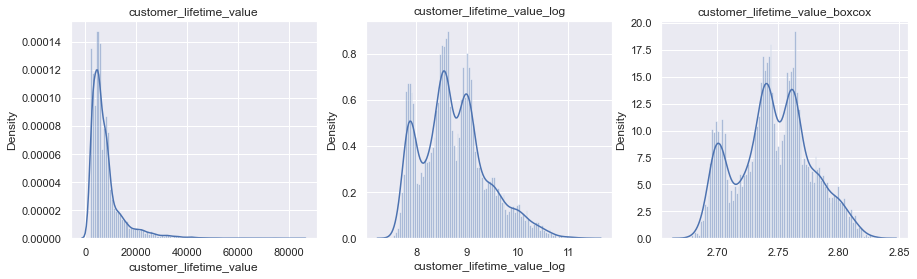

In [17]:
from scipy import stats
def feat_log_box(df, feature, bins = 100):
    """makes a log Transformation and a boxcox transformation of a feature of a dataframe. \n
    0 values are replaced with the mean in the transformation: \n
    plots 3 distplots next to each other for comparison \n
    tales 3 arguments (df, feature, bins)"""
    df[feature+'_log'] = list(map(lambda x: np.log(x) if np.isfinite(x) and x!=0 else np.NAN, df[feature]))
    df[feature+'_log'] = df[feature+'_log'].fillna(np.mean(df[feature+'_log']))
    df[feature+'_boxcox'] = np.where(df[feature]<=0,0,df[feature])
    mean = np.sum(df[feature+'_boxcox'])/len(df[df[feature+'_boxcox']>0])
    df[feature+'_boxcox'] = df[feature+'_boxcox'].replace(0,mean)
    xt, lmbda = stats.boxcox(df[feature+'_boxcox'])
    df[feature+'_boxcox'] = xt
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4))
    sns.distplot(df[feature], bins, ax=ax1)
    ax1.set_title(feature)
    sns.distplot(df[feature+'_log'], bins, ax=ax2)
    ax2.set_title(feature + '_log')
    sns.distplot(xt, bins, ax=ax3)
    ax3.set_title(feature + '_boxcox')
    return df

feat_log_box(nums, 'customer_lifetime_value')

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
